In [1]:
%pip cache purge;
%pip install pandas;
%pip install seaborn;
%pip install matplotlib;
%pip install scikit-learn;
%pip install nltk;
%pip install gensim;
%pip install spacy;
!python -m spacy download en_core_web_sm;

Note: you may need to restart the kernel to use updated packages.


ERROR: Need an action (dir, info, list, purge, remove) to perform.


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Inteli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Inteli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Inteli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Inteli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Inteli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Inteli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Inteli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



✘ No compatible package found for 'en_core_web_sm;' (spaCy v3.7.4)



In [2]:
import spacy
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from gensim.models import KeyedVectors
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Inteli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Limpeza de dados

In [3]:
def segmentacao(texto, nlp):
    """
    Segmenta um texto em frases usando um modelo de processamento de linguagem.

    Args:
        texto: str - O texto a ser segmentado em frases.

    Returns:
        list: Uma lista das frases segmentadas.
    """


    # Processa o texto usando o modelo SpaCy
    doc = nlp(texto)

    # Extrai cada frase do documento e armazena na lista
    frases_segmentadas = [sent.text for sent in doc.sents]
    
    # Retorna a lista de frases segmentadas
    return frases_segmentadas


In [4]:
def tokenizar(texto, nlp):
    """
    Tokeniza um texto em palavras usando um modelo de processamento de linguagem.

    Args:
        texto: str - O texto a ser tokenizado em palavras.
        nlp: Modelo de processamento de linguagem.
    Returns:
        list: Uma lista de palavras tokenizadas.
    """
    # Processa o texto usando o modelo SpaCy

    doc = nlp(texto)
    # Extrai os tokens do documento e retorna como lista de textos de tokens em minúsculas
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_space]
    return tokens

In [5]:
#funçao de stop words
def remove_stop_words(tokens, nlp):
    """
    Remove as stop words de uma lista de tokens.

    Args:
        tokens: list - Uma lista de tokens.

    Returns:
        list: Uma lista de tokens sem as stop words.
    """
    # Carrega as stop words do modelo SpaCy
    stop_words = nlp.Defaults.stop_words

    # Remove as stop words dos tokens
    return [token for token in tokens if token not in stop_words]

In [6]:
def lematizacao(tokens, nlp):
    """
    Transforma cada palavra para sua base usando um lematizador.

    Args:
        tokens: list - Uma lista de palavras a serem lematizadas.
        nlp: Language - Modelo SpaCy carregado para processamento de linguagem.

    Returns:
        list: Uma lista das palavras lematizadas.
    """

    # Processa a string obtida pela junção dos elementos da lista
    doc = nlp(' '.join(tokens))

    # Extrai o lema de cada token no documento e armazena na nova lista
    frase_lematizada = [token.lemma_ for token in doc]
    
    # Retorna a lista lematizada
    return frase_lematizada

In [7]:
def NER(texto, nlp):
    """
    Categoriza as palavras como entidades e tipos.

    Args:
        texto: str - O texto a ser processado.

    Returns:
        
    """

    doc = nlp(texto)
    
    print([(ent.text, ent.label_) for ent in doc.ents])

    return [(ent.text, ent.label_) for ent in doc.ents]


In [8]:
#se a palavra começar com https ou http ela deve ser removida

def remove_http(texto):
    '''
    Função que remove palavras que começam com http ou https
    
    Args:
        texto : str -> texto que será processado
    
    Returns:
        texto : str -> texto sem as palavras que começam com http ou https
    '''
    
    # Expressão regular para identificar palavras que começam com http ou https
    padrao = r'\b(?:https?://\S+)\b'
    
    # Substitui as palavras que correspondem ao padrão por uma string vazia
    texto_sem_http = re.sub(padrao, '', texto)
    
    return texto_sem_http

In [9]:
def pipeline(nlp, texto):
    """
    Executa um pipeline de processamento de texto.

    Args:
        nlp: Language - Modelo SpaCy carregado para processamento de linguagem.
        texto: str - O texto a ser processado.

    Returns:
        list: Uma lista de frases segmentadas.
        list: Uma lista de tokens.
        list: Uma lista de tokens sem stop words.
        list: Uma lista de tokens lematizados.
        list: Uma lista de tuplas com as entidades e tipos.
    """

    # Segmenta o texto em frases
    frases = segmentacao(texto, nlp)

    #remove os links
    newTexto = remove_http(texto)

    # Tokeniza o texto
    tokens = tokenizar(newTexto, nlp)

    # Remove as stop words
    tokens_sem_stop_words = remove_stop_words(tokens, nlp)
    
    tokens_lematizados = lematizacao(tokens_sem_stop_words, nlp)

    # Identifica as entidades nomeadas
    entidades_nomeadas = NER(texto, nlp)

    return " ".join(tokens_lematizados)



In [11]:
def data_load(caminho_arquivo, coluna_texto):
    """
    retorna os dados do arquivo csv, mais em especifico a coluna de texto

    Args:
        caminho_arquivo: str - O caminho para o arquivo CSV.
        coluna_texto: str - O nome da coluna no CSV que contém os textos.

    Returns:
        list: Uma lista que representa o dataframe com os textos
    """
    dados = pd.read_csv(caminho_arquivo)
    dados = dados.dropna(axis=1)
    return dados[coluna_texto].to_list()

def clean_data():
    """
    Carrega os dados do arquivo CSV e executa um pipeline de processamento de texto.
        Args:
            None
        Returns:
            list: Uma lista de textos processados.
    """
    data = data_load("./data/classification-labeled.csv", "comment")
    nlp = spacy.load("en_core_web_sm")
    cleaned_data = []
    for texto in data:
        cleaned_data.append(pipeline(nlp, texto))
    #salva os dados limpos em um arquivo csv
    df = pd.DataFrame(cleaned_data)
    df.to_csv('./data/cleaned_data.csv', index=False)
    return cleaned_data

cleaned = clean_data()

[('The Mighty Swift Radio Cars of', 'ORG'), ('Stalybridge', 'NORP')]
[('20 minutes', 'TIME'), ('Jesus', 'PERSON')]
[('Guardian', 'ORG'), ('Monday 11', 'DATE'), ('July 2022', 'DATE')]
[('Uber/Uber', 'ORG')]
[]
[]
[('DM', 'GPE')]
[('months', 'DATE'), ('https://t.co/DjcGHX9fYx', 'ORG')]
[]
[]
[('didn?t', 'ORG'), ('100s', 'CARDINAL'), ('millions', 'CARDINAL'), ('VC', 'GPE')]
[('https://t.co/9DxclvnZ5Z', 'GPE')]
[('2013 to 2017', 'DATE'), ('Uber', 'PERSON'), ('https://t.co/w0xsiLYL8D', 'PERSON')]
[]
[]
[('BBC News', 'ORG'), ('Uber BBC News', 'ORG'), ('Uber  https://t.co/ISRfSUc5n9', 'PERSON')]
[('Macron Uber Alles', 'PERSON')]
[('https://t.co/R5txdagJJC', 'DATE')]
[('Belgium', 'GPE'), ('10 2022', 'DATE'), ('1', 'CARDINAL'), ('FRAITA', 'ORG'), ('14', 'CARDINAL'), ('319.7', 'CARDINAL'), ('4', 'CARDINAL'), ('LoveIsland', 'ORG'), ('186.1', 'CARDINAL'), ('Sri Lanka', 'PERSON'), ('159.1', 'CARDINAL'), ('Sainz', 'ORG'), ('71.3', 'CARDINAL'), ('Belgium', 'GPE')]
[('Uber', 'PERSON')]
[('bro', 'ORG')

# Modelos de predição neutros-positivos

## Importando dados

In [14]:
df_class = pd.read_csv(".\data\classification-labeled.csv").dropna(axis=0)
print(df_class.head())
df_cleaned = pd.read_csv("./data/cleaned_data.csv").dropna(axis=0)
df_train = pd.concat([df_class, df_cleaned], axis=0)
#selecionar apenas as linhas que possuem 0 ou 1 na coluna sentiment
df_train = df_train[df_train['sentiment'].isin([0,1])]




   id                                            comment  sentiment
0   1  That, my friend, is why The Mighty Swift Radio...          0
1   2  Spent 20 minutes in an Uber listening to what ...          0
2   3  via The Guardian  Guardian front page, Monday ...         -1
3   4  My real job is being my girlfriends personal U...          0
4   5               i had a bad drive . i want my refund         -1


## Definindo modelo word2vec

In [17]:
model_path = './data/GoogleNews-vectors-negative300.bin'

model = KeyedVectors.load_word2vec_format(model_path, binary=True)

### Funções de vetorização

In [18]:
def get_average_word2vec(tokens_list, model, generate_missing=False, k=300):
    """
    Obtém o vetor médio de um texto usando um modelo Word2Vec.
    
    Args:
        tokens_list (list): Lista de tokens.
        model (KeyedVectors): Modelo Word2Vec treinado.
        generate_missing (bool): Se True, gera vetores para palavras ausentes no modelo.
        k (int): Dimensão do vetor.
    
    Returns:
        np.array: Vetor médio do texto.
    """
    if len(tokens_list) < 1:
        return np.zeros(k)
    vectorized = [model[word] if word in model else np.zeros(k) for word in tokens_list]
    avg_vec = np.mean(vectorized, axis=0)
    return avg_vec

In [19]:
def vectorize_text(df, model):
    """
    Vetoriza um texto usando um modelo Word2Vec.
    
    Args:
        df (DataFrame): DataFrame contendo os textos.
        model (KeyedVectors): Modelo Word2Vec treinado.
        
    Returns:
        np.array: Vetores dos textos.
    """
    vectorized_texts = []
    for text in df:
        tokens = text.split()
        vectorized_texts.append(get_average_word2vec(tokens, model))
    return np.array(vectorized_texts)

In [20]:
def plot_confusion_matrix(cm, labels):
    """
    Plota uma matriz de confusão.
    
    Args:
        cm (np.array): Matriz de confusão.
        labels (list): Lista de rótulos.
    
    Returns:
        None: A função plota a matriz de confusão.
    """
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greys', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

## Modelos

In [21]:
from sklearn.model_selection import GridSearchCV

### Logistic Regression

Accuracy: 0.7873563218390804
F1 Score: 0.0
Precision: 0.0
Recall: 0.0


C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


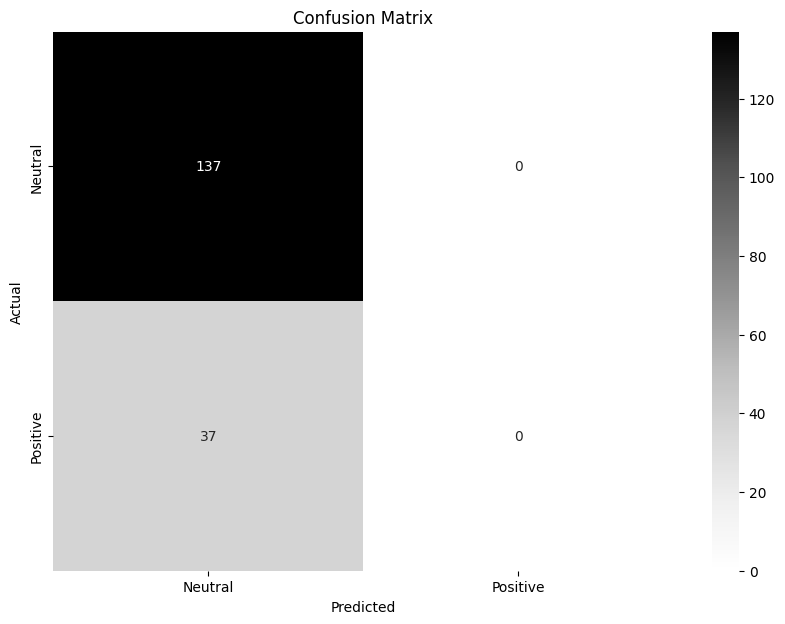

In [22]:
def logisticRegressionw2v(df, w2v_model):
    """
    Realiza a classificação de textos usando Regressão Logística.
    
    Args:
        df (DataFrame): DataFrame contendo os textos.
        w2v_model (KeyedVectors): Modelo Word2Vec treinado.
        
    Returns:
        None: A função imprime as métricas de avaliação.
    """
    df["0"] = df["0"].astype(str)
    X = vectorize_text(df['0'], w2v_model)
    y = df['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, ['Neutral', 'Positive'])

logisticRegressionw2v(df_train, model)


### Random Forest

Accuracy: 0.7873563218390804
F1 Score: 0.0
Precision: 0.0
Recall: 0.0


C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


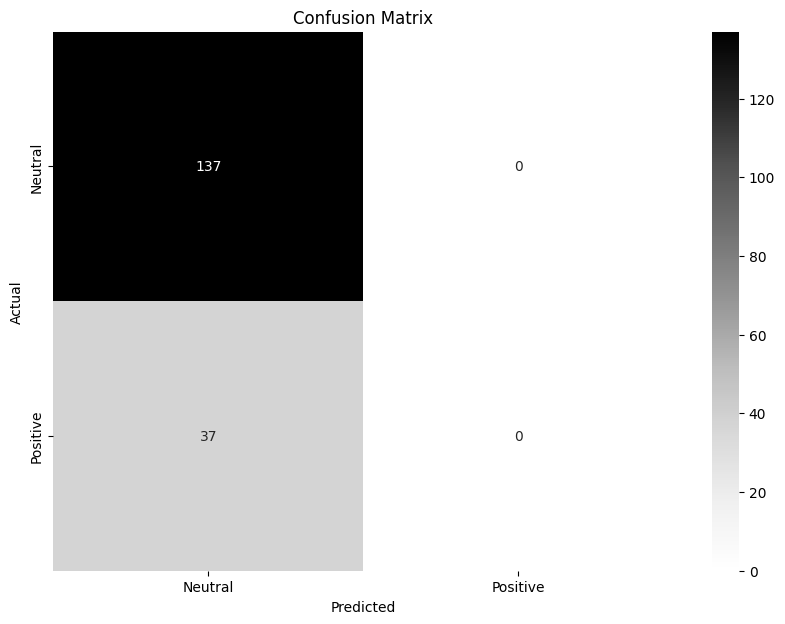

In [23]:
def randomForestw2v(df, w2v_model):
    """
    Realiza a classificação de textos usando Random Forest.
    
    Args:
        df (DataFrame): DataFrame contendo os textos.
        w2v_model (KeyedVectors): Modelo Word2Vec treinado.
        
    Returns:
        None: A função imprime as métricas de avaliação.
    """
    df["0"] = df["0"].astype(str)
    X = vectorize_text(df['0'], w2v_model)
    y = df['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, ['Neutral', 'Positive'])
    
randomForestw2v(df_train, model)

Accuracy: 0.7873563218390804
F1 Score: 0.0
Precision: 0.0
Recall: 0.0
[[137   0]
 [ 37   0]]


C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


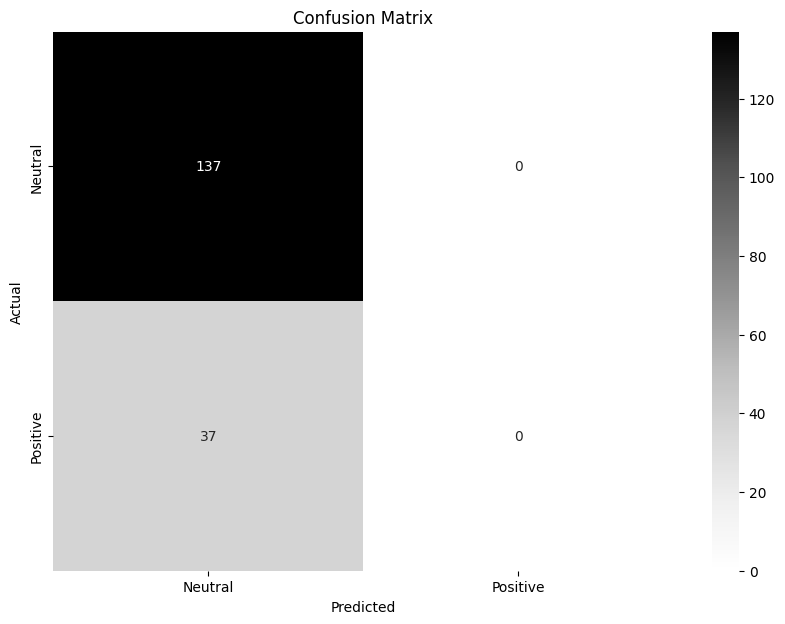

In [24]:
def svmw2v(df, w2v_model):
    """
    Realiza a classificação de textos usando SVM.
    
    Args:
        df (DataFrame): DataFrame contendo os textos.
        w2v_model (KeyedVectors): Modelo Word2Vec treinado.
        
    Returns:
        None: A função imprime as métricas de avaliação.
    """
    df["0"] = df["0"].astype(str)
    X = vectorize_text(df['0'], w2v_model)
    y = df['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plot_confusion_matrix(cm, ['Neutral', 'Positive'])
    
svmw2v(df_train, model)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


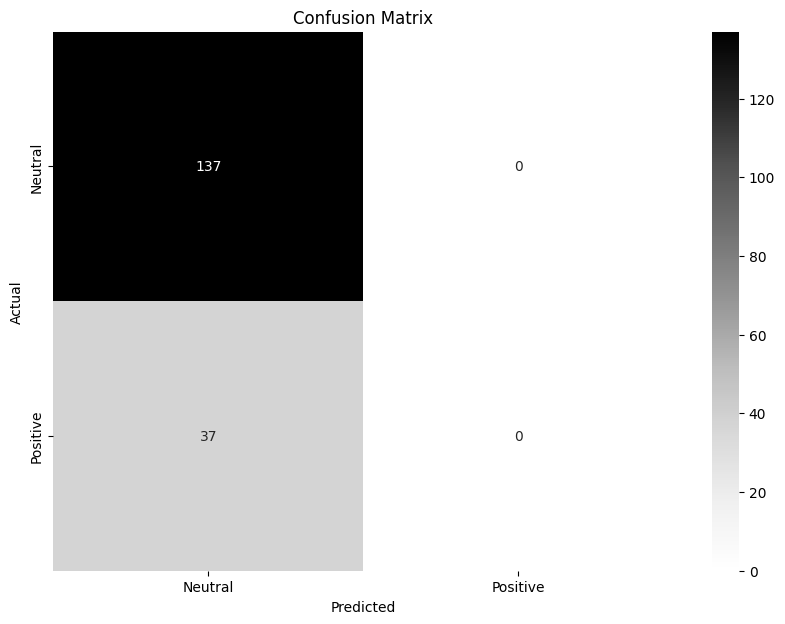

In [25]:
def svmWithGridSearch(df, w2v):
    """
    Realiza a classificação de textos usando SVM com Grid Search.
    
    Args:
        df (DataFrame): DataFrame contendo os textos.
        w2v_model (KeyedVectors): Modelo Word2Vec treinado.
        
    Returns:
        None: A função imprime as métricas de avaliação.
    """
    df["0"] = df["0"].astype(str)
    X = vectorize_text(df['0'], w2v)
    y = df['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}
    grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, ['Neutral', 'Positive'])
    
svmWithGridSearch(df_train, model)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .................max_features=auto, n_estimators=50; total time=   0.0s
[CV] END .................max_features=auto, n_estimators=50; total time=   0.0s
[CV] END .................max_features=auto, n_estimators=50; total time=   0.0s
[CV] END .................max_features=auto, n_estimators=50; total time=   0.0s
[CV] END .................max_features=auto, n_estimators=50; total time=   0.0s
[CV] END ................max_features=auto, n_estimators=100; total time=   0.0s
[CV] END ................max_features=auto, n_estimators=100; total time=   0.0s
[CV] END ................max_features=auto, n_estimators=100; total time=   0.0s
[CV] END ................max_features=auto, n_estimators=100; total time=   0.0s
[CV] END ................max_features=auto, n_estimators=100; total time=   0.0s
[CV] END ................max_features=auto, n_estimators=200; total time=   0.0s
[CV] END ................max_features=auto, n_es

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-p

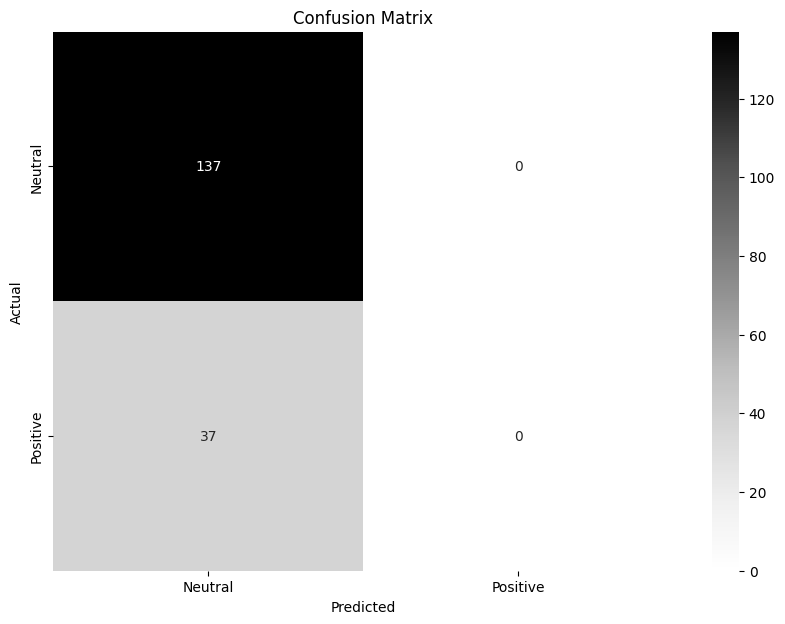

In [26]:
def randomForestGridSearch(df, w2v_model):
    """
    Realiza a classificação de textos usando Random Forest com Grid Search.
    
    Args:
        df (DataFrame): DataFrame contendo os textos.
        w2v_model (KeyedVectors): Modelo Word2Vec treinado.
        
    Returns:
        None: A função imprime as métricas de avaliação.
    """
    df["0"] = df["0"].astype(str)
    X = vectorize_text(df['0'], w2v_model)
    y = df['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    param_grid = {'n_estimators': [50, 100, 200, 400], 'max_features': ['auto', 'sqrt', 'log2']}
    grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=2)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, ['Neutral', 'Positive'])
    
randomForestGridSearch(df_train, model)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ................................C=0.1, max_iter=100; total time=   0.0s
[CV] END ................................C=0.1, max_iter=100; total time=   0.0s
[CV] END ................................C=0.1, max_iter=100; total time=   0.0s
[CV] END ................................C=0.1, max_iter=100; total time=   0.0s
[CV] END ................................C=0.1, max_iter=100; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=1000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=1000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=1000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=1000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=1000; total time=   0.0s
[CV] END ..............................C=0.1, max_iter=10000; total time=   0.0s
[CV] END ..............................C=0.1, ma

C:\Users\Inteli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


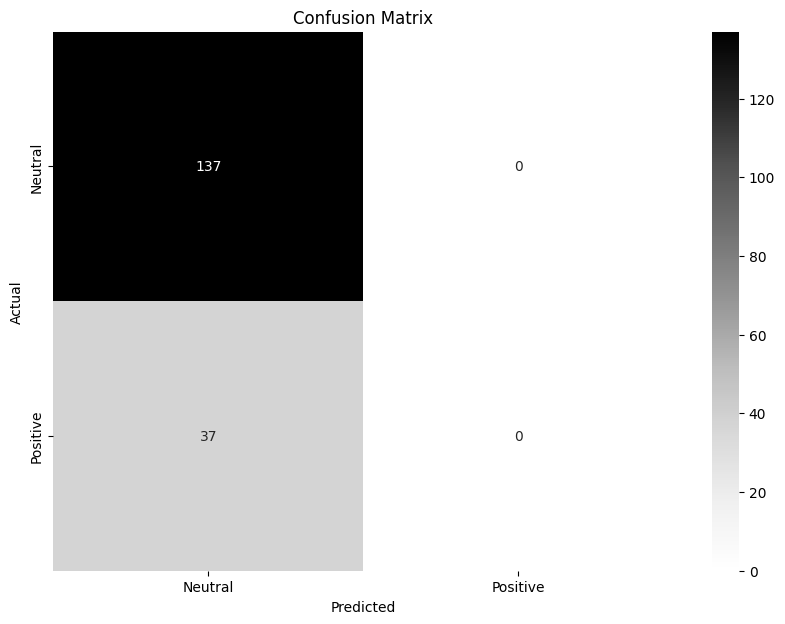

In [27]:
def logisticRegressionGridSearch(df, w2vmodel):
    """
    Realiza a classificação de textos usando Regressão Logística com Grid Search.
    
    Args:
        df (DataFrame): DataFrame contendo os textos.
        w2v_model (KeyedVectors): Modelo Word2Vec treinado.
        
    Returns:
        None: A função imprime as métricas de avaliação.
    """
    df["0"] = df["0"].astype(str)
    X = vectorize_text(df['0'], w2vmodel)
    y = df['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    param_grid = {'C': [0.1, 1, 10, 100], 'max_iter': [100, 1000, 10000]}
    grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=2)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, ['Neutral', 'Positive'])
    
logisticRegressionGridSearch(df_train, model)